In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
matches = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches.csv', index_col=-0)

In [5]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Tim Robinson,Match Report,NaN,18.0,5.0,14.8,0.0,0,0,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Stuart Attwell,Match Report,NaN,19.0,8.0,13.6,1.0,0,0,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Anthony Taylor,Match Report,NaN,11.0,3.0,13.4,0.0,0,0,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Michael Oliver,Match Report,NaN,14.0,5.0,14.9,0.0,0,0,Liverpool
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Tony Harrington,Match Report,NaN,19.0,12.0,16.6,0.0,0,0,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,Andre Marriner,Match Report,NaN,8.0,1.0,18.2,0.0,0,0,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,Simon Hooper,Match Report,NaN,7.0,0.0,13.4,1.0,0,0,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,Jonathan Moss,Match Report,NaN,10.0,3.0,18.5,0.0,0,0,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,Robert Jones,Match Report,NaN,11.0,1.0,18.3,1.0,0,0,Sheffield United


In [6]:
matches.shape

(3358, 27)

In [8]:
#Matches values count by teams
matches["team"].value_counts()

,count
team,
West Ham United,168
Manchester United,168
Arsenal,168
Wolverhampton Wanderers,168
Manchester City,168
Aston Villa,168
Crystal Palace,168
Brighton and Hove Albion,168
Tottenham Hotspur,168


In [10]:
# Filtering Liverpool team and sorting by date
matches[matches["team"] == "Liverpool"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Michael Oliver,Match Report,NaN,20.0,4.0,18.4,0.0,2,2,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Paul Tierney,Match Report,NaN,18.0,5.0,18.2,1.0,0,0,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Craig Pawson,Match Report,NaN,21.0,8.0,17.9,0.0,0,0,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Martin Atkinson,Match Report,NaN,14.0,8.0,16.3,1.0,0,0,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Michael Oliver,Match Report,NaN,22.0,8.0,16.0,2.0,0,0,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,2024-11-09,20:00,Premier League,Matchweek 11,Sat,Home,W,2.0,0.0,Aston Villa,...,David Coote,Match Report,NaN,14.0,5.0,16.1,0.0,0,0,Liverpool
17,2024-11-24,14:00,Premier League,Matchweek 12,Sun,Away,W,3.0,2.0,Southampton,...,Samuel Barrott,Match Report,NaN,26.0,10.0,18.2,1.0,1,1,Liverpool
19,2024-12-01,16:00,Premier League,Matchweek 13,Sun,Home,W,2.0,0.0,Manchester City,...,Chris Kavanagh,Match Report,NaN,17.0,6.0,17.5,0.0,1,1,Liverpool
20,2024-12-04,19:30,Premier League,Matchweek 14,Wed,Away,D,3.0,3.0,Newcastle Utd,...,Andy Madley,Match Report,NaN,16.0,5.0,12.7,0.0,0,0,Liverpool


In [11]:
matches["round"].value_counts()

,count
round,
Matchweek 1,100
Matchweek 9,100
Matchweek 2,100
Matchweek 16,100
Matchweek 13,100
Matchweek 12,100
Matchweek 11,100
Matchweek 10,100
Matchweek 14,100


In [12]:
matches.dtypes

,0
date,object
time,object
comp,object
round,object
day,object
venue,object
result,object
gf,float64
ga,float64
opponent,object


In [13]:
del matches["comp"]

In [14]:
del matches["notes"]

In [15]:
matches["date"] = pd.to_datetime(matches["date"])

In [16]:
matches["target"] = (matches["result"] == "W").astype("int")

In [17]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,referee,match report,sh,sot,dist,fk,pk,pkatt,team,target
0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,Tim Robinson,Match Report,18.0,5.0,14.8,0.0,0,0,Liverpool,1
1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,Stuart Attwell,Match Report,19.0,8.0,13.6,1.0,0,0,Liverpool,1
2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,Anthony Taylor,Match Report,11.0,3.0,13.4,0.0,0,0,Liverpool,1
3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,Michael Oliver,Match Report,14.0,5.0,14.9,0.0,0,0,Liverpool,0
5,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,...,Tony Harrington,Match Report,19.0,12.0,16.6,0.0,0,0,Liverpool,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,Andre Marriner,Match Report,8.0,1.0,18.2,0.0,0,0,Sheffield United,0
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,Simon Hooper,Match Report,7.0,0.0,13.4,1.0,0,0,Sheffield United,0
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.2,...,Jonathan Moss,Match Report,10.0,3.0,18.5,0.0,0,0,Sheffield United,1
41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.9,...,Robert Jones,Match Report,11.0,1.0,18.3,1.0,0,0,Sheffield United,0


In [27]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

In [30]:
matches.columns

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'match report', 'sh', 'sot', 'dist', 'fk',
       'pk', 'pkatt', 'team', 'target', 'venue_code', 'opp_code', 'hour',
       'day_code'],
      dtype='object')

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [33]:
train = matches[matches["date"] < '2024-01-01']

In [34]:
test = matches[matches["date"] > '2024-01-01']

In [35]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [36]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [38]:
preds = rf.predict(test[predictors])

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy = accuracy_score(test["target"], preds)
accuracy

0.6447368421052632

In [42]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

In [43]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,350,81
1,162,91


In [44]:
from sklearn.metrics import precision_score

precision_score(test["target"], preds)

0.5290697674418605

In [45]:
grouped_matches = matches.groupby("team")

In [46]:
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [47]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [48]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,1.3,...,17,5,2.000000,2.333333,17.333333,4.666667,19.700000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,1.0,...,12,5,1.333333,2.000000,17.333333,3.666667,18.566667,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,1.6,...,12,5,1.000000,0.666667,16.666667,4.333333,18.933333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,1.4,...,16,6,1.000000,0.333333,14.333333,6.666667,19.033333,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,1.4,...,17,5,1.000000,0.666667,12.000000,5.666667,20.000000,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2024-11-23,17:30,Matchweek 12,Sat,Home,L,0.0,4.0,Tottenham,2.1,...,17,5,1.000000,1.333333,18.333333,5.666667,15.066667,0.000000,0.000000,0.000000
20,2024-12-01,16:00,Matchweek 13,Sun,Away,L,0.0,2.0,Liverpool,0.8,...,16,6,0.666667,2.666667,18.666667,5.000000,14.333333,0.000000,0.000000,0.000000
21,2024-12-04,19:30,Matchweek 14,Wed,Home,W,3.0,0.0,Nott'ham Forest,2.4,...,19,2,0.333333,2.666667,15.333333,4.333333,14.900000,0.000000,0.000000,0.000000
22,2024-12-07,15:00,Matchweek 15,Sat,Away,D,2.0,2.0,Crystal Palace,1.4,...,15,5,1.000000,2.000000,16.000000,4.333333,15.266667,0.333333,0.000000,0.000000


In [49]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

<ipython-input-49-d7a196cb9ce7>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))


In [50]:
matches_rolling

date   time         round  day venue result  \
team                                                                           
Arsenal                 6  2020-10-04  14:00   Matchweek 4  Sun  Home      W   
                        7  2020-10-17  17:30   Matchweek 5  Sat  Away      L   
                        9  2020-10-25  19:15   Matchweek 6  Sun  Home      L   
                        11 2020-11-01  16:30   Matchweek 7  Sun  Away      W   
                        13 2020-11-08  19:15   Matchweek 8  Sun  Home      L   
...                               ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 13 2024-11-23  15:00  Matchweek 12  Sat  Away      W   
                        14 2024-11-30  15:00  Matchweek 13  Sat  Home      L   
                        15 2024-12-04  19:30  Matchweek 14  Wed  Away      L   
                        16 2024-12-09  20:00  Matchweek 15  Mon  Away      L   
                        17 2024-12-14  15:00  Matchweek 16  Sat  Home      L   

                             gf   ga         opponent   xg  ...  hour  \
team                                                        ...         
Arsenal                 6   2.0  1.0    Sheffield Utd  0.6  ...    14   
                        7   0.0  1.0  Manchester City  0.9  ...    17   
                        9   0.0  1.0   Leicester City  0.7  ...    19   
                        11  1.0  0.0   Manchester Utd  1.0  ...    16   
                        13  0.0  3.0      Aston Villa  1.5  ...    19   
...                         ...  ...              ...  ...  ...   ...   
Wolverhampton Wanderers 13  4.0  1.0           Fulham  1.3  ...    15   
                        14  2.0  4.0      Bournemouth  0.5  ...    15   
                        15  0.0  4.0          Everton  0.8  ...    19   
                        16  1.0  2.0         West Ham  1.4  ...    20   
                        17  1.0  2.0     Ipswich Town  1.3  ...    15   

                            day_code  gf_rolling ga_rolling sh_rolling  \
team                                                                     
Arsenal                 6          6    2.000000   1.333333   8.000000   
                        7          5    1.666667   1.666667   5.666667   
                        9          6    1.000000   1.666667   7.000000   
                        11         6    0.666667   1.000000   9.666667   
                        13         6    0.333333   0.666667   9.666667   
...                              ...         ...        ...        ...   
Wolverhampton Wanderers 13         5    2.000000   1.333333  11.000000   
                        14         5    2.666667   1.000000   9.666667   
                        15         2    2.666667   1.666667   9.333333   
                        16         0    2.000000   3.000000   8.666667   
                        17         5    1.000000   3.333333  11.666667   

                           sot_rolling dist_rolling fk_rolling  pk_rolling  \
team                                                                         
Arsenal                 6     3.666667    14.633333   0.666667    0.000000   
                        7     3.666667    15.366667   0.000000    0.000000   
                        9     3.666667    16.566667   0.666667    0.000000   
                        11    4.000000    16.566667   1.000000    0.000000   
                        13    2.666667    19.333333   1.000000    0.333333   
...                                ...          ...        ...         ...   
Wolverhampton Wanderers 13    5.666667    17.533333   0.000000    0.000000   
                        14    5.000000    19.066667   0.000000    0.000000   
                        15    4.000000    19.833333   0.333333    0.000000   
                        16    3.333333    19.033333   0.333333    0.000000   
                        17    3.333333    19.500000   0.333333    0.000000   

                            pkatt_rolling  
team                

In [51]:
matches_rolling = matches_rolling.droplevel('team')

In [52]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.6,...,14,6,2.000000,1.333333,8.000000,3.666667,14.633333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,5,1.666667,1.666667,5.666667,3.666667,15.366667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.7,...,19,6,1.000000,1.666667,7.000000,3.666667,16.566667,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.0,...,16,6,0.666667,1.000000,9.666667,4.000000,16.566667,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,6,0.333333,0.666667,9.666667,2.666667,19.333333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2024-11-23,15:00,Matchweek 12,Sat,Away,W,4.0,1.0,Fulham,1.3,...,15,5,2.000000,1.333333,11.000000,5.666667,17.533333,0.000000,0.000000,0.000000
14,2024-11-30,15:00,Matchweek 13,Sat,Home,L,2.0,4.0,Bournemouth,0.5,...,15,5,2.666667,1.000000,9.666667,5.000000,19.066667,0.000000,0.000000,0.000000
15,2024-12-04,19:30,Matchweek 14,Wed,Away,L,0.0,4.0,Everton,0.8,...,19,2,2.666667,1.666667,9.333333,4.000000,19.833333,0.333333,0.000000,0.000000
16,2024-12-09,20:00,Matchweek 15,Mon,Away,L,1.0,2.0,West Ham,1.4,...,20,0,2.000000,3.000000,8.666667,3.333333,19.033333,0.333333,0.000000,0.000000


In [53]:
matches_rolling.index = range(matches_rolling.shape[0])

In [57]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [58]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [59]:
error

0.5957446808510638

In [60]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [61]:
combined.head(10)

,actual,predicted,date,team,opponent,result
131,1,0,2024-01-20,Arsenal,Crystal Palace,W
132,1,1,2024-01-30,Arsenal,Nott'ham Forest,W
133,1,0,2024-02-04,Arsenal,Liverpool,W
134,1,1,2024-02-11,Arsenal,West Ham,W
135,1,1,2024-02-17,Arsenal,Burnley,W
136,1,1,2024-02-24,Arsenal,Newcastle Utd,W
137,1,1,2024-03-04,Arsenal,Sheffield Utd,W
138,1,1,2024-03-09,Arsenal,Brentford,W
139,0,0,2024-03-31,Arsenal,Manchester City,D
140,1,0,2024-04-03,Arsenal,Luton Town,W


In [62]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"}
mapping = MissingDict(**map_values)

In [63]:
combined["new_team"] = combined["team"].map(mapping)

In [64]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [65]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,1,0,2024-01-20,Arsenal,Crystal Palace,W,Arsenal,0,0,Crystal Palace,Arsenal,L,Crystal Palace
1,1,1,2024-01-30,Arsenal,Nott'ham Forest,W,Arsenal,0,0,Nottingham Forest,Arsenal,L,Nottingham Forest
2,1,0,2024-02-04,Arsenal,Liverpool,W,Arsenal,0,1,Liverpool,Arsenal,L,Liverpool
3,1,1,2024-02-11,Arsenal,West Ham,W,Arsenal,0,0,West Ham United,Arsenal,L,West Ham
4,1,1,2024-02-17,Arsenal,Burnley,W,Arsenal,0,0,Burnley,Arsenal,L,Burnley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,1,0,2024-11-23,Wolverhampton Wanderers,Fulham,W,Wolves,0,1,Fulham,Wolves,L,Fulham
622,0,0,2024-11-30,Wolverhampton Wanderers,Bournemouth,L,Wolves,1,0,Bournemouth,Wolves,W,Bournemouth
623,0,0,2024-12-04,Wolverhampton Wanderers,Everton,L,Wolves,1,0,Everton,Wolves,W,Everton
624,0,0,2024-12-09,Wolverhampton Wanderers,West Ham,L,Wolves,1,1,West Ham United,Wolves,W,West Ham


In [66]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

,count
actual_x,
1,100
0,66


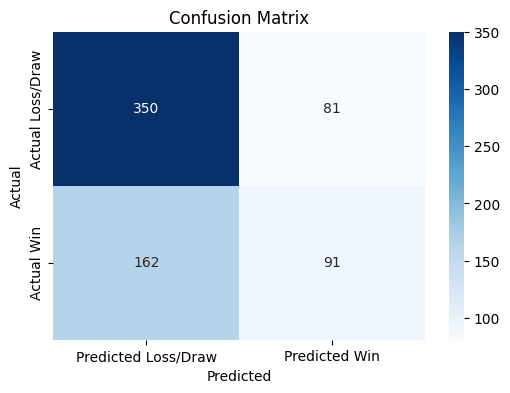

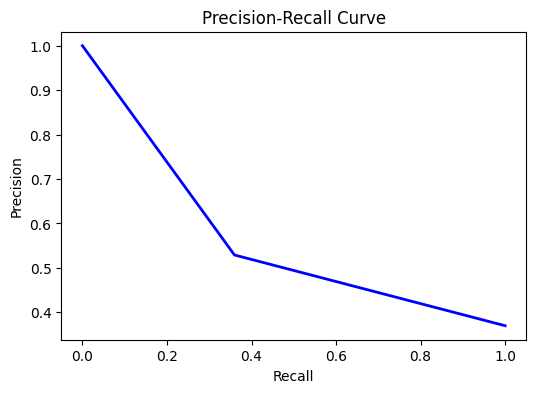

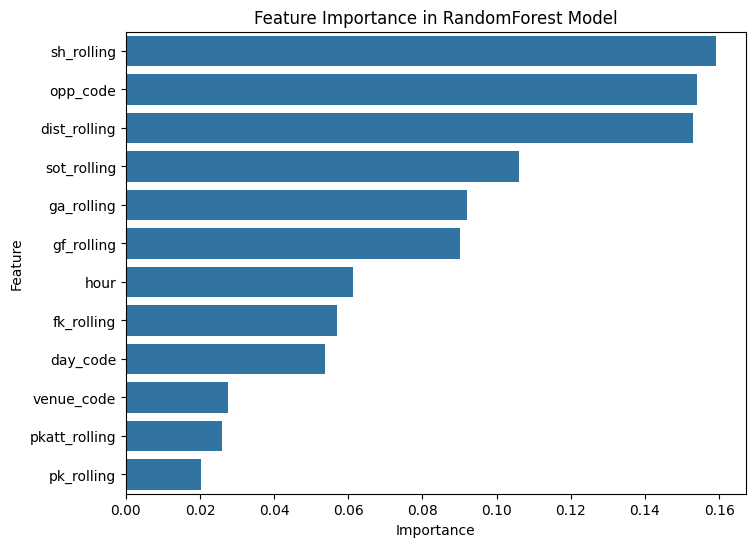

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# Assuming matches and other variables are already defined above this point

# 1. Confusion Matrix Plot
cm = confusion_matrix(test["target"], preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Loss/Draw", "Predicted Win"], yticklabels=["Actual Loss/Draw", "Actual Win"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# 2. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(test["target"], preds)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color="b", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 3. Feature Importance Plot
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': predictors + new_cols,  # Assuming 'predictors' and 'new_cols' are used for training
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in RandomForest Model")
plt.show()
